# Image Caption Generator

This notebook is a to-do guide about generating captions for images and it's comparision to the latest models for generating these captions. 

# Problem Description

Image caption generation models are models that analyze images and automatically generate relevant captions. 

They combine techniques from computer vision and natural language processing to “understand” an image's visual content and express it in natural language. This task is complex because it requires not only recognizing objects in an image but also understanding their context, relationships, and the ability to translate this understanding into a coherent sentence.

## Intuition

- Images can be compressed to vectors of a multitude of features. These can be generated using a CNN (Convolutional Neural Network).

- Our goal is to generate a suitable `caption` for the image given, which is a sequence of texts. We can generate a sequence using an RNN (Recurrent Neural Network) like LSTM(Long-Short Term Memory) or GRU (Gated Recurrent Unit)

- We push the Image vector(feature vector) as our initial state for RNN and try to generate text at each time-step of the RNN using the feature vector.

- While training, we will already have our images and captions at the ready. Get our feature vector of the image and push the feature vector against a untrained/ pre-trained RNN and compare it with our actual caption output. Train it with back-prop to get better at accuracy. 

# Strategy

- Use the pretrained `Inception_V3` model to generate the feature vector of the image.

- Pass it through an RNN to generate an output embedding and compare it to the actual output in the embedding form, use an error function with these two and backprop to get a fix of this hybrid model, to generate accurate captions. 

- We are going to implement both `LSTM` and `GRU` architectures as our caption generation models.

- We are using the `MSCOCO` Dataset for our task of image caption generation, with an 80-20 train-test split.

## Models

### LSTM

### GRU

### InceptionV3

## Model Scoring Approach

### BLEU Score

BLEU (Bilingual Evaluation Understudy) is a widely used metric for evaluating the quality of machine-translated text.

BLEU is an algorithm that measures the correspondence between a machine translation and professional human translations of the same text.

> Reference: https://en.wikipedia.org/wiki/BLEU

BLEU compares n-grams (sequences of n consecutive words) of the machine-translated text with n-grams of reference human translations. The algorithm:

- Calculates n-gram precision scores (typically for 1 to 4-grams)
- Applies a brevity penalty to penalize short translations
- Combines these scores using a weighted geometric mean

- BLEU scores range from 0 to 1, where 1 indicates a perfect match with the reference translation.
- In practice, scores between 0.6-0.7 are considered very good.
- Scores closer to 1 are rare and may indicate overfitting

> Reference: https://towardsdatascience.com/foundations-of-nlp-explained-bleu-score-and-wer-metrics-1a5ba06d812b

In [58]:
from nltk.translate.bleu_score import sentence_bleu

reference = [["this", "is", "a", "test"]]
candidate = ["this", "is", "test"]

score = sentence_bleu(reference, candidate)
print(score)

8.987727354491445e-155


/Users/smatcha/anaconda3/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/smatcha/anaconda3/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


# Code

## Installs and Environment Setup

In [59]:
%pip install numpy pytorch tensorflow
%pip install keras # For latest versions of tensorflow, it is advised to use keras externally 
%pip install keras_nlp

  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/9c/gldj5rjn0699dnx6qgv9jyqr0000gn/T/pip-install-8qajt7yb/pytorch_f4f8e0e8b3ff47619381eab8ab713036/setup.py", line 15, in <module>
          raise Exception(message)
      Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pytorch)
Note: you may need

In [60]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


In [61]:
import torch

# Check if CUDA (GPU support) is available
if torch.cuda.is_available():
    print("CUDA is available!")
    print(f"GPU Device Name: {torch.cuda.get_device_name(0)}")
    print(f"Number of GPUs available: {torch.cuda.device_count()}")
    print(f"Current GPU Memory Allocated: {torch.cuda.memory_allocated(0)} bytes")
    print(f"Current GPU Memory Cached: {torch.cuda.memory_reserved(0)} bytes")
else:
    print("CUDA is not available. Using CPU.")


CUDA is not available. Using CPU.


In [62]:
%pip show torchvision

Name: torchvision
Version: 0.20.1
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: /Users/smatcha/anaconda3/lib/python3.11/site-packages
Requires: numpy, pillow, torch
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [63]:
%pip uninstall pandas -y
%pip install pandas

Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
Note: you may need to restart the kernel to use updated packages.
  Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl (11.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 2.19.0 requires pyarrow>=12.0.0, but you have pyarrow 11.0.0 which is incompatible.
pinecone-datasets 0.7.0 requires pinecone-client<4.0.0,>=3.0.0, but you have pinecone-client 5.0.1 which is incompatible.
pinecone-datasets 0.7.0 requires pydantic<2.0.0,>=1.10.5, but you have pydantic 2.9.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [64]:
%pip uninstall numpy -y
%pip install "numpy>1.8,<2.0"

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.
  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (114 kB)
Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl (14.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompatible.
tensorflow-macos 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.6.0 which is incompatible.
tensorflow-macos 2.15.0 requires ml-dtypes~=0.2.0, but you have ml-dtypes 0.3.2 which is incompatible.
tensorflow-macos 2.15.0 requires tensorboard<2.16,>=2.15, but you have tensorboard 2.17.1 which is incompatible.
langchain-community 0.3.0 requi

## Imports

In [65]:
import importlib

In [66]:
def print_module_version(module_name):
    try:
        version = importlib.metadata.version(module_name)
        print(f"{module_name} Version: ",version)
    except importlib.metadata.PackageNotFoundError:
         print(f"{module_name} is not installed or version information is not available")

In [67]:
import numpy as np
print_module_version("numpy")
import pandas as pd
print_module_version("pandas")
import tensorflow as tf
print_module_version("tensorflow")
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, GRU, Dense, Dropout, Add
from keras_nlp.tokenizers import Tokenizer, WordPieceTokenizer  # This may need to be changed if not compatible
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical 
# Importing Pycoctools for potential dataset handling from the coco["train2017"] API -- Python Version
import pycocotools
print_module_version("pycocotools")
from sklearn.model_selection import train_test_split
print_module_version("sklearn")
from nltk.translate.bleu_score import sentence_bleu
print_module_version("nltk")
from scipy.spatial.distance import cosine
print_module_version("scipy")
import re
print_module_version("re")
import pickle
print_module_version("pickle")
import os
print_module_version("os")
import glob
print_module_version("glob")
from PIL import Image
print_module_version("PIL")
from tqdm import tqdm
print_module_version("tqdm")
from time import time
print_module_version("time")

numpy Version:  1.26.4
pandas Version:  2.2.3
tensorflow Version:  2.17.0
pycocotools Version:  2.0
sklearn is not installed or version information is not available
nltk Version:  3.8.1
scipy Version:  1.11.1
re is not installed or version information is not available
pickle is not installed or version information is not available
os is not installed or version information is not available
glob is not installed or version information is not available
PIL is not installed or version information is not available
tqdm Version:  4.65.0
time is not installed or version information is not available


In [68]:
%matplotlib inline
from pycocotools.coco import COCO
import skimage.io as io
print_module_version("skimage.io")
import matplotlib.pyplot as plt
print_module_version("matplotlib")
import pylab
print_module_version("pylab")
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

skimage.io is not installed or version information is not available
matplotlib Version:  3.7.2
pylab is not installed or version information is not available


In [69]:
# Parallelization Imports
from concurrent.futures import ThreadPoolExecutor, as_completed, ProcessPoolExecutor
print_module_version("concurrent")

concurrent is not installed or version information is not available


## Implementation

### Installing MSCOCO Dataset and Understanding the COCO API

- We have installed it with Github Import from [CocoAPI](https://github.com/cocodataset/cocoapi)
- Used make tool to install from MakeFile of the `cocoapi/PythonAPI` folder in the repository, with the command below. 

$$ make -f MakeFile $$  

But this has only provided us with the validation datasets. What we actually want are all the datasets -- train, val, test. Foe which we used the `pycocotools` module/ API for installing the COCO dataset.

> In the Common Objects in Context (COCO) dataset, an annotation is a list of objects in an image, along with detailed information about each object. This information includes the object's class label, bounding box coordinates, and segmentation mask. 

> Annotations are stored in a JSON file, along with other information about the images and dataset.

#### Instance Viewing

In [70]:
dataDir='./dataset'
dataTypes=['train2017','val2017']

In [71]:
def generate_coco_ds_files(datadir,datatypes):
    coco = dict()
    for dataType in dataTypes:
        annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
        coco[dataType]=COCO(annFile)
    return coco

In [72]:
coco = generate_coco_ds_files(datadir=dataDir,datatypes=dataTypes)

loading annotations into memory...


Done (t=48.65s)
creating index...
index created!
loading annotations into memory...
Done (t=1.05s)
creating index...
index created!


In [73]:
print(coco['train2017'].info())
print("")
print("")
print(coco['val2017'].info())


description: COCO 2017 Dataset
url: http://cocodataset.org
version: 1.0
year: 2017
contributor: COCO Consortium
date_created: 2017/09/01
None


description: COCO 2017 Dataset
url: http://cocodataset.org
version: 1.0
year: 2017
contributor: COCO Consortium
date_created: 2017/09/01
None


In [74]:
coco['train2017'].getAnnIds()

[156,
 509,
 603,
 918,
 1072,
 1727,
 1728,
 1767,
 1769,
 1774,
 2144,
 2251,
 2255,
 2259,
 2280,
 2281,
 2496,
 2498,
 2500,
 2526,
 2532,
 2534,
 2544,
 3003,
 3165,
 3212,
 3323,
 3375,
 3488,
 3692,
 3817,
 4047,
 4061,
 4079,
 4254,
 4430,
 4474,
 4654,
 4703,
 4893,
 4932,
 4940,
 5037,
 5181,
 5544,
 5560,
 5585,
 5623,
 5637,
 5652,
 5812,
 6099,
 6104,
 6172,
 6174,
 6259,
 6656,
 7023,
 7064,
 7158,
 7178,
 7228,
 7287,
 7305,
 7319,
 7486,
 7514,
 7588,
 7670,
 7793,
 7880,
 7910,
 8000,
 8084,
 8442,
 8715,
 8721,
 8793,
 8807,
 8915,
 8989,
 9022,
 9031,
 9040,
 9065,
 9120,
 9155,
 9280,
 9417,
 9553,
 9626,
 9657,
 9819,
 10032,
 10071,
 10187,
 10385,
 10442,
 10449,
 10527,
 10600,
 10750,
 11070,
 11097,
 11207,
 11272,
 11290,
 11381,
 11491,
 11554,
 11571,
 11592,
 11640,
 11650,
 11660,
 11682,
 11706,
 11840,
 11970,
 12030,
 12047,
 12282,
 12543,
 12731,
 12770,
 12781,
 12790,
 12799,
 12882,
 12994,
 13200,
 13226,
 13283,
 13328,
 13399,
 13678,
 13836,
 

In [75]:
# display COCO categories and supercategories
cats = coco["train2017"].loadCats(coco["train2017"].getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
appliance sports kitchen animal outdoor person vehicle furniture electronic indoor food accessory


In [76]:
# get all images containing given categories, select one at random
catIds = coco["train2017"].getCatIds(catNms=['person','dog','skateboard']);
print(len(catIds))
if(len(catIds)<=5):
    print(catIds)
imgIds = coco["train2017"].getImgIds(catIds=catIds)
print(len(imgIds))
if(len(imgIds)<=5):
    print(imgIds)
# Get a Random Image from the above categories
img = coco["train2017"].loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

3
[1, 18, 41]
65


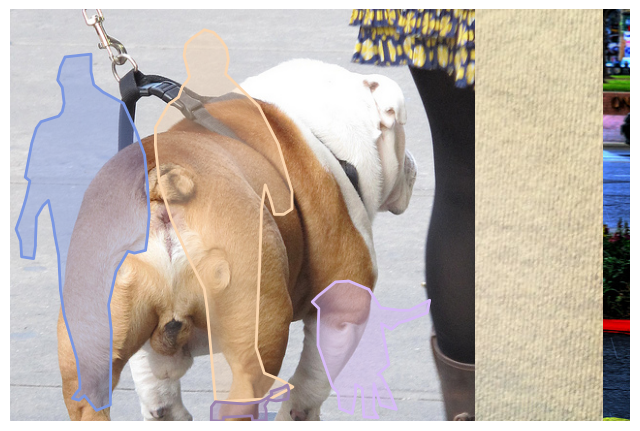

In [77]:
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

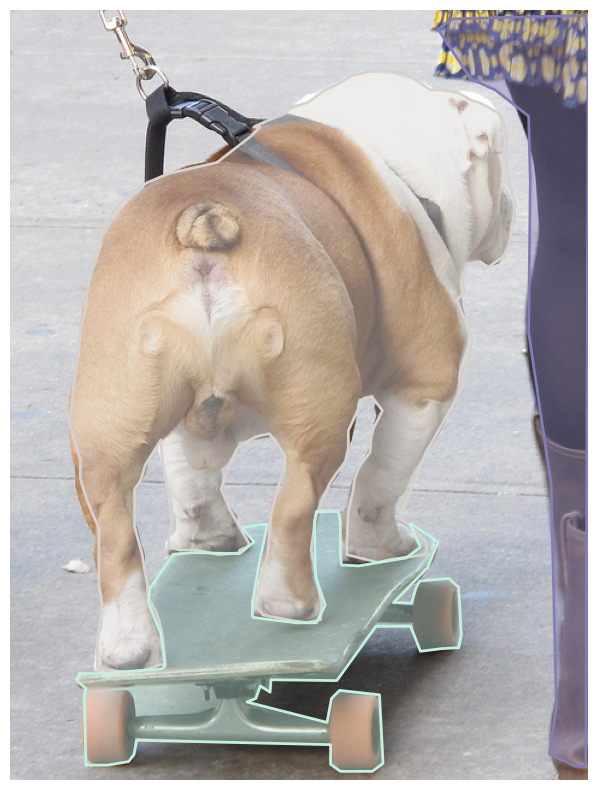

In [78]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco["train2017"].getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco["train2017"].loadAnns(annIds)
coco["train2017"].showAnns(anns)

#### Caption Viewing

The code below demostrates loading the captions of the dataset based on image id of the COCO annotations 

In [79]:
dataDir='./dataset'
dataTypes=['train2017','val2017']

In [80]:
def generate_coco_ds_caption_files(datadir,datatypes):
    coco = dict()
    for dataType in dataTypes:
        annFile='{}/annotations/captions_{}.json'.format(dataDir,dataType)
        coco[dataType]=COCO(annFile)
    return coco

In [81]:
coco_caps = generate_coco_ds_caption_files(datadir=dataDir,datatypes=dataTypes)

loading annotations into memory...
Done (t=1.73s)
creating index...
index created!
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


[145556, 166985, 173420, 174137, 176867]
A small brown and white bulldog riding a skateboard.
A dog riding on a skateboard next to a person.
The dog is on a skate board beside its owner
The dog is riding a skateboard on the sidewalk.
a close up of a bulldog riding a skate board


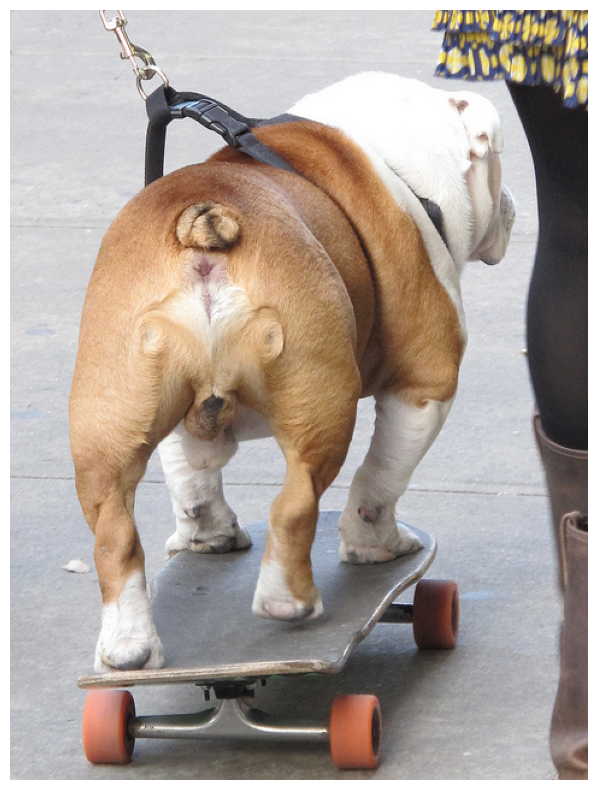

In [82]:
# load and display caption annotations
annIds = coco_caps["train2017"].getAnnIds(imgIds=img['id'])
print(annIds)
anns = coco_caps["train2017"].loadAnns(annIds)
coco_caps["train2017"].showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()

#### Review

Now we have a solid understanding of what to do in order to load the COCO dataset. 

### Model Installation

In [83]:
inception_model_pretrained = InceptionV3(weights='imagenet',classifier_activation=None)
inception_model_pretrained.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 149, 149,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 147, 147,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 147, 147,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 73, 73,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 73, 73,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 71, 71,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 23,851,784 (90.99 MB)

 Trainable params: 23,817,352 (90.86 MB)

 Non-trainable params: 34,432 (134.50 KB)

### Input Setup

Before getting to the next part of the model build, we will demonstrate the build up of both the image and the caption set at once. 

In [84]:
coco # Annotations Object of Train 2017, Validation 2017 Datasets

{'train2017': <pycocotools.coco.COCO at 0x3a5cf5f10>,
 'val2017': <pycocotools.coco.COCO at 0x427bc1b10>}

In [85]:
coco_caps # Captions Object of Train 2017, Validation 2017 Datasets

{'train2017': <pycocotools.coco.COCO at 0x3a704dc10>,
 'val2017': <pycocotools.coco.COCO at 0x4b1a714d0>}

In [86]:
img_ids={}
img_ids["train2017"] = coco["train2017"].getImgIds()
img_ids["val2017"] = coco["val2017"].getImgIds()
len(img_ids["train2017"]),len(img_ids["val2017"])

(118287, 5000)

We have approximately 118,000 training images and just 5000 for validation. 

We are making a split to include only 20,000 images and 5000 images for training and validation. at pre-processing / data modernization.  

We are now buliding a simple method to demostrate image and caption side-by-side

In [87]:
def generate_images_and_captions(setType,img_ids=[],printSingleImage=False):
    try:
        if(printSingleImage):
            try:
                print("Printing Random Image")
                image_ids=coco[setType].getImgIds()
                unique_img_id = image_ids[np.random.randint(0,len(image_ids))]
                unique_img = coco[setType].loadImgs(unique_img_id)
                unique_ann_id = coco_caps[setType].getAnnIds(imgIds=[unique_img_id])
                unique_ann = coco_caps[setType].loadAnns(unique_ann_id)
                print(unique_img[0])
                unique_img_object = io.imread(unique_img[0]['coco_url'])
                plt.imshow(unique_img_object)
                plt.axis('off')
                plt.show()
                print("COCO URL: ",unique_img[0]['coco_url'])
                print("----Annotations----")
                coco_caps[setType].showAnns(unique_ann)
                
            except:
                print("There has been an unexpected error.")
                return None
        if(img_ids==[]):
            collection={}
            image_ids=coco[setType].getImgIds()
            images = coco[setType].loadImgs(image_ids)
            annIds = coco_caps[setType].getAnnIds()
            anns = coco_caps[setType].loadAnns(annIds)
            collection["images"] = images
            collection["anns"] = anns
            return collection
        else:
            collection={}
            image_ids=coco[setType].getImgIds(img_ids=img_ids)
            images = coco[setType].loadImgs(image_ids)
            annIds = coco_caps[setType].getAnnIds(img_ids=img_ids)
            anns = coco_caps[setType].loadAnns(annIds)
            collection["images"] = images
            collection["anns"] = anns
            return collection
        
    except:
        print("There has been an unexpected error.")
        return None

Now generating input/output set with a random image+annotation print

Printing Random Image
{'license': 3, 'file_name': '000000568418.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000568418.jpg', 'height': 402, 'width': 640, 'date_captured': '2013-11-23 19:55:17', 'flickr_url': 'http://farm3.staticflickr.com/2706/4505507226_36140eef19_z.jpg', 'id': 568418}


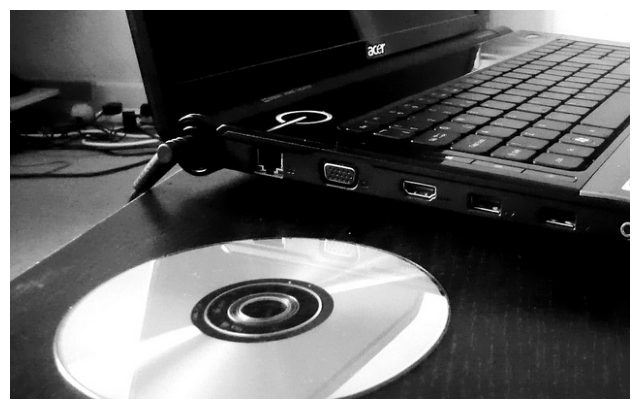

COCO URL:  http://images.cocodataset.org/train2017/000000568418.jpg
----Annotations----
A C.D. sitting beside a laptop on a desk. 
A full view of a room with something in front. 
Black and white, close up of top-side view of a CD next to an open lap top.
A view of a laptop with a disc that is flipped upside down on the table.
A CD that is sitting near a laptop.


In [88]:
data={}
data["train2017"] = generate_images_and_captions("train2017",printSingleImage=True)
data["val2017"] = generate_images_and_captions("val2017",printSingleImage=False)

In [89]:
data["train2017"]["images"] = data["train2017"]["images"][:20000]
len(data["train2017"]["images"])

20000

### Generating Feature Vectors

After setting up data input/output for our main task, we focus on our next step, `Feature Generation` with the pre-trained `InceptionV3` model, with the last layer removed to augment the model for our task of caption generation.

In [90]:
inception_model_pretrained = Model(inception_model_pretrained.input, inception_model_pretrained.layers[-2].output)
inception_model_pretrained.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 149, 149,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 147, 147,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 147, 147,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 73, 73,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 73, 73,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 71, 71,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [91]:
# Mini-model method to break long-variable loops

def break_loop(index,count=5):
    if(count==None):
        return False
    if index<=count:
        return True
    else:
        return False

Parallel Code

In [92]:


def process_image(img_file):
    try:
        img_obj = io.imread(img_file['coco_url'])
        img_id = img_file["id"]
        img = np.resize(img_obj,(299, 299, 3))
        if img.shape == (299, 299, 3):
            img = np.expand_dims(img, axis=0)
            img = preprocess_input(img)
            feature = inception_model_pretrained.predict(img, verbose=0)
            return img_id,feature.reshape(-1)
    except Exception as e:
        print(f"Error processing image {img_file['id']}: {e}",end="\n")
        return img_file["id"], None

def parallel_feature_extraction(images, num_workers=os.cpu_count()):
    features_dict = {}
    print("Beginning Feature Extraction")
    with ThreadPoolExecutor(max_workers=num_workers) as executor:
        futures = {executor.submit(process_image, img): img for img in images}
        
        for future in tqdm(as_completed(futures), total=len(futures)):
            img_id, features = future.result()
            if features is not None:
                features_dict[img_id] = features
    print("Completed Feature Extraction")
    return features_dict



In [93]:
features = {
    "train2017":{},
    "val2017":{}
}

In [94]:
features["val2017"]=parallel_feature_extraction(data["val2017"]["images"][:50])

Beginning Feature Extraction


  0%|          | 0/50 [00:00<?, ?it/s]

  2%|▏         | 1/50 [00:02<02:26,  2.99s/it]

 10%|█         | 5/50 [00:03<00:21,  2.10it/s]

100%|██████████| 50/50 [00:05<00:00,  8.80it/s]

Completed Feature Extraction


In [123]:
features["train2017"]=parallel_feature_extraction(data["train2017"]["images"][:200])

Beginning Feature Extraction


  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:11<00:00, 17.75it/s]

Completed Feature Extraction


### Caption Preprocessing

Since we have paired up images and captions, we can preprocess the captions to embedding vectors to make the comparision with the generated vector output.

In [96]:
def preprocess_caption(caption):
    caption = caption.lower()
    caption = re.sub(r'[^a-z\s]', '', caption)
    caption = ' '.join(caption.split())
    caption = "startseq " + caption + " endseq"
    return caption


After building the method, we preprocess our train dataset captions and create a vocab list from them.

In [97]:
# Prepare tokenizer
all_captions={}
all_captions["train2017"] = [preprocess_caption(item['caption']) for item in data["train2017"]["anns"]]
all_captions["val2017"] = [preprocess_caption(item['caption']) for item in data["val2017"]["anns"]]
print(len(all_captions["train2017"]))
set_captions_list = list(set((" ".join(all_captions["train2017"])).split(" ")))
vocab = ["UNK"]+ ["PAD"]+ list(set_captions_list)
vocab

591753


['UNK',
 'PAD',
 'storey',
 'michrowave',
 'fritata',
 'refelection',
 'connectors',
 'bowed',
 'clearly',
 'tibet',
 'raccoon',
 'tweeds',
 'pharmacy',
 'laze',
 'feel',
 'captivity',
 'resturatant',
 'tiffany',
 'ordeurves',
 'siccors',
 'artichoke',
 'cart',
 'skiff',
 'mirroring',
 'forst',
 'munchkins',
 'lettuce',
 'microsoft',
 'unadorned',
 'berlin',
 'cabinet',
 'shit',
 'trappist',
 'inbound',
 'wonders',
 'review',
 'merky',
 'wrack',
 'snooping',
 'bibs',
 'seabirds',
 'salem',
 'urge',
 'articulo',
 'horsse',
 'warmed',
 'area',
 'negotiate',
 'multimeter',
 'equally',
 'ramen',
 'ladel',
 'mules',
 'forever',
 'utility',
 'og',
 'collections',
 'walla',
 'orbit',
 'despicable',
 'anaimal',
 'attend',
 'blackgrey',
 'nitendo',
 'variable',
 'nickknacks',
 'adjusted',
 'redwhite',
 'speedo',
 'slaloms',
 'luncheonette',
 'rate',
 'cactuslike',
 'sconce',
 'autism',
 'matches',
 'womean',
 'mirrpr',
 'schwarz',
 'surfside',
 'accelerating',
 'poem',
 'musical',
 'animals',
 

### Tokenization

Now we build a `WordPieceTokenizer` from the generated vocabulary list.

In [98]:
wp_tokenizer = WordPieceTokenizer(
    vocabulary=vocab,
    lowercase=True,
    oov_token='UNK',
    dtype="int32",
)

In [99]:
vocab_size = wp_tokenizer.vocabulary_size()
max_length = max(len(c.split()) for c in all_captions["train2017"])
print(vocab_size)
print(max_length)

28563
51


In [100]:
wp_tokenizer.get_vocabulary()

['UNK',
 'PAD',
 'storey',
 'michrowave',
 'fritata',
 'refelection',
 'connectors',
 'bowed',
 'clearly',
 'tibet',
 'raccoon',
 'tweeds',
 'pharmacy',
 'laze',
 'feel',
 'captivity',
 'resturatant',
 'tiffany',
 'ordeurves',
 'siccors',
 'artichoke',
 'cart',
 'skiff',
 'mirroring',
 'forst',
 'munchkins',
 'lettuce',
 'microsoft',
 'unadorned',
 'berlin',
 'cabinet',
 'shit',
 'trappist',
 'inbound',
 'wonders',
 'review',
 'merky',
 'wrack',
 'snooping',
 'bibs',
 'seabirds',
 'salem',
 'urge',
 'articulo',
 'horsse',
 'warmed',
 'area',
 'negotiate',
 'multimeter',
 'equally',
 'ramen',
 'ladel',
 'mules',
 'forever',
 'utility',
 'og',
 'collections',
 'walla',
 'orbit',
 'despicable',
 'anaimal',
 'attend',
 'blackgrey',
 'nitendo',
 'variable',
 'nickknacks',
 'adjusted',
 'redwhite',
 'speedo',
 'slaloms',
 'luncheonette',
 'rate',
 'cactuslike',
 'sconce',
 'autism',
 'matches',
 'womean',
 'mirrpr',
 'schwarz',
 'surfside',
 'accelerating',
 'poem',
 'musical',
 'animals',
 

In [101]:
wp_tokenizer.tokenize(all_captions["train2017"][0])

<tf.Tensor: shape=(12,), dtype=int32, numpy=
array([25554, 19699, 10105, 27166, 25469, 19699, 26700, 22489, 20904,
       21946,  1009, 18078], dtype=int32)>

In [102]:
print(wp_tokenizer.token_to_id("startseq"))
print(wp_tokenizer.token_to_id("endseq"))
print(wp_tokenizer.token_to_id("UNK"))
print(wp_tokenizer.token_to_id("PAD"))


25554
18078
0
1


Saving this WP Tokenizer.

In [103]:
with open('wp_tokenizer.pkl', 'wb') as f:
    pickle.dump(wp_tokenizer, f)

### Sequence Padding

Now after saving the WP Tokenizer, we build a method to pad our sequences of words.

First of all, we load back the Word Piece Tokenizer

In [104]:
with open('wp_tokenizer.pkl', 'rb') as file:
    wp_tokenizer = pickle.load(file)
wp_tokenizer # build=True comes when it is used inside a model.

<WordPieceTokenizer name=word_piece_tokenizer, built=False>

### Model Implementation

Now we define our models with this method below. These two models will be our LSTM and GRU models.

In [106]:
vocab_size = vocab_size
max_length = max_length

In [134]:
model_shape_structure = {
    "feature_input":(2048,),
    "embedding_dim":256,
    "vocab_size":vocab_size,
    "max_length":(max_length,),
    "return_sequences":False
}

In [135]:
def define_model(model_shape_structure,rnn_type="LSTM",model_name="lstm_model",return_sequences=False):
    model = Sequential()
    
    feature_input = Input(shape=model_shape_structure["feature_input"])
    feature_input_drp = Dropout(0.5)(feature_input)
    feature_sec = Dense(model_shape_structure["embedding_dim"], activation='relu')(feature_input_drp)
    
    caption_inputs = Input(shape=(model_shape_structure["max_length"]))
    se1 = Embedding(model_shape_structure["vocab_size"],model_shape_structure["embedding_dim"], mask_zero=True)(caption_inputs)
    se2 = Dropout(0.5)(se1)
    
    if rnn_type == "LSTM":
        seq_model = LSTM(units=model_shape_structure["embedding_dim"], return_sequences=return_sequences)(se2)
    else:
        seq_model = GRU(units=model_shape_structure["embedding_dim"], return_sequences=return_sequences)(se2)
    
    decoder1 = Add()([feature_sec, seq_model])
    decoder2 = Dense(model_shape_structure["embedding_dim"], activation='relu')(decoder1)
    outputs = Dense(model_shape_structure["vocab_size"], activation='softmax')(decoder2)

    print("Output Final Shape: ",outputs.shape)    

    model = Model(inputs=[feature_input, caption_inputs], outputs=outputs, name=model_name)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    return model
    
    

In [136]:
lstm_model = define_model(model_shape_structure=model_shape_structure,rnn_type="LSTM",return_sequences=model_shape_structure["return_sequences"])
gru_model = define_model(model_shape_structure=model_shape_structure,rnn_type="GRU",model_name="gru_model",return_sequences=model_shape_structure["return_sequences"])

Output Final Shape:  (None, 28563)
Output Final Shape:  (None, 28563)


Here below are the summaries of our models

In [137]:
lstm_model.summary()

Model: "lstm_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 51)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_10      │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_4         │ (None, 51, 256)   │  7,312,128 │ input_layer_11[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 2048)      │          0 │ input_layer_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 51, 256)   │          0 │ embedding_4[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_4         │ (None, 51)        │          0 │ input_layer_11[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 256)       │    524,544 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 256)       │    525,312 │ dropout_9[0][0],  │
│                     │                   │            │ not_equal_4[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 256)       │          0 │ dense_12[0][0],   │
│                     │                   │            │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 256)       │     65,792 │ add_4[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 28563)     │  7,340,691 │ dense_13[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 15,768,467 (60.15 MB)

 Trainable params: 15,768,467 (60.15 MB)

 Non-trainable params: 0 (0.00 B)

In [127]:
gru_model.summary()

Model: "gru_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 20)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_8       │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 20, 256)   │  7,312,128 │ input_layer_9[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 2048)      │          0 │ input_layer_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 20, 256)   │          0 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_3         │ (None, 20)        │          0 │ input_layer_9[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 256)       │    524,544 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_1 (GRU)         │ (None, 256)       │    394,752 │ dropout_7[0][0],  │
│                     │                   │            │ not_equal_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 256)       │          0 │ dense_9[0][0],    │
│                     │                   │            │ gru_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 256)       │     65,792 │ add_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 28563)     │  7,340,691 │ dense_10[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 15,637,907 (59.65 MB)

 Trainable params: 15,637,907 (59.65 MB)

 Non-trainable params: 0 (0.00 B)

In [138]:
def generate_padded_seq(seq, wp_tokenizer):
    seq=wp_tokenizer.tokenize(seq)
    padded_seq = pad_sequences(
        [seq],
        maxlen=max_length,
        padding='post',
        value=1
    )
    return padded_seq

def generate_inputs_by_id(setType,img_id):
    try:
        annotations_ids = coco_caps[setType].getAnnIds(imgIds=[img_id])
        annotations_obj = coco_caps[setType].loadAnns(annotations_ids)
        annotations = [preprocess_caption(item['caption']) for item in annotations_obj]
        random_annotation = annotations[np.random.randint(0,len(annotations))]
        feature = features[setType][img_id]
        return feature , random_annotation
    except KeyError:
        return None, None

def generate_sequences(setType):
    X1, X2, y = [], [], []
    # index = 0
    if(setType=="train2017"):
        box = data["train2017"]["images"][:100]
    else:
        box = data["val2017"]["images"][:50]
    for imageObj in (box):
        img_id = imageObj['id']
        x1, x2 = generate_inputs_by_id(setType=setType,img_id=img_id)
        if(x1.any()==None and x2==None):
            continue
        seq = generate_padded_seq(x2,wp_tokenizer=wp_tokenizer)
        for i in range(1, len(seq[0])):
            in_seq, out_seq = seq[0][:i], seq[0][i]
            out_seq = to_categorical(out_seq, num_classes=vocab_size)
            X1.append(x1) # Extending vectors give you extension along wrong axis
            padded_in_seq = pad_sequences(
                [in_seq],
                maxlen=max_length,
                padding='post',
                value=1
            )
            X2.extend(padded_in_seq)
            y.append(out_seq) # Extending vectors give you extension along wrong axis
        # index+=1

        # if(break_loop(index,count=1)):
        #     print(x1.shape,x2)
        # if break_loop(index):
        #     break

    return np.array(X1), np.array(X2), np.array(y)

In [139]:
X1val,X2val,yval = generate_sequences("val2017")

In [140]:
X1train,X2train,ytrain = generate_sequences("train2017")

In [141]:
X1train = np.array(X1train)
X2train = np.array(X2train)
ytrain = np.array(ytrain )

print(X1train.shape)
print(X2train.shape)
print(ytrain.shape)

(5000, 2048)
(5000, 51)
(5000, 28563)


In [142]:
X1val = np.array(X1val)
X2val = np.array(X2val)
yval = np.array(yval)

print(X1val.shape)
print(X2val.shape)
print(yval.shape)

(2500, 2048)
(2500, 51)
(2500, 28563)


In [169]:
lstm_model.fit([X1train, X2train], ytrain, epochs=20, batch_size=32)

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 98ms/step - loss: 1.1175
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - loss: 1.0480
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - loss: 1.0937
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - loss: 1.0502
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - loss: 1.0815
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - loss: 1.0673
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - loss: 1.0730
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - loss: 1.0588
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - loss: 1.1017
Epoch 10/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - loss: 1.0569
Epoch 11/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - loss: 1.0679
Epoch 12/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - loss: 1.0614
Epoch 13/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - loss: 1.0585
Epoch 14/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - loss: 1.1203
Epoch 15/20
157/157 ━━━━━━━━━

In [144]:
gru_model.fit([X1train, X2train], ytrain, epochs=20, batch_size=32, validation_data=([X1val, X2val], yval))

Epoch 1/20


/Users/smatcha/anaconda3/lib/python3.11/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_681', 'keras_tensor_684']. Received: the structure of inputs=('*', '*')
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 106ms/step - loss: 3.5136 - val_loss: 2.1537
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - loss: 1.6682 - val_loss: 2.1911
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - loss: 1.5893 - val_loss: 1.5914
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - loss: 1.0170 - val_loss: 1.5797
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - loss: 1.0190 - val_loss: 1.6821
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - loss: 1.0238 - val_loss: 1.7335
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - loss: 0.9751 - val_loss: 1.6743
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - loss: 0.9421 - val_loss: 1.7538
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - loss: 0.8705 - val_loss: 1.7474
Epoch 10/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - loss: 0.7874 - val_loss: 1.9449
Epoch 11/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - loss: 0.7250 - val_loss: 1.9072
Epoch 12/20
157/157 ━━━━━━━━━━━━━━━━━━━━

In [160]:
def generate_caption(model, tokenizer, photo, pretrained_img_model, max_length):

    def process_image(img_file):
        try:
            img = np.resize(img_obj,(299, 299, 3))
            if img.shape == (299, 299, 3):
                img = np.expand_dims(img, axis=0)
                img = preprocess_input(img)
                feature = inception_model_pretrained.predict(img, verbose=0)
                return feature.reshape(-1)
        except Exception as e:
            print(f"Error processing image {img_file['id']}: {e}",end="\n")
            return None

    in_text = 'startseq'
    gen_seq = ''
    gen_seq += in_text

    for i in range(max_length):
        padded_seq = generate_padded_seq(gen_seq, wp_tokenizer)
        feature_vec = process_image(photo)
        feature_vec = np.resize(feature_vec, (1,2048))
        yhat = model.predict([feature_vec, padded_seq], verbose=0)
        original_token = np.argmax(yhat, axis=1)
        resp = tokenizer.detokenize(original_token)

        if resp is not None and resp not in ['startseq', 'endseq']:
            gen_seq += " " + resp

        if resp == 'endseq':
            break
    gen_seq = gen_seq.replace('startseq','')
    return gen_seq

In [172]:
img_obj = io.imread(data["val2017"]["images"][5]['coco_url'])
caption_generated = generate_caption(gru_model,wp_tokenizer,img_obj,inception_model_pretrained,20)
caption_generated

' a view of a bunch of some of shelves of a bathroom'

In [173]:
annIds = coco_caps["val2017"].getAnnIds(imgIds=data["val2017"]["images"][5]['id'])
anns = coco_caps["val2017"].loadAnns(annIds)
captions = coco_caps["val2017"].showAnns(anns)

A bathroom that has a broken wall in the shower.
A bathroom looks clean but is missing tile at the shower stall.
A view of a bathroom that needs to be fixed up.
a shower toilet and sink in a basement bathroom
A very big whit rest room with a shabby looking shower.


In [175]:
anns[0]['caption']

'A bathroom that has a broken wall in the shower.'

In [176]:
bleu = sentence_bleu(anns[0]['caption'], caption_generated)
bleu

/Users/smatcha/anaconda3/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/smatcha/anaconda3/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/smatcha/anaconda3/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or

1.318705411715495e-231

# Observations

- Losses in GRU arriving earlier than LSTM.
- Simpler architecture of GRUs causing faster convergence than LSTMs.
- Training on more epochs will lead to final better results.

- Losses are settling faster.
- Resemblance of repetitive data.
- Need better formulation of data points and a better architecture strategy.

# Conclusion

Even though GRU's simpler architecture can lead to faster results (less losses quickly), LSTMs are better at storing long sequences, because of how they store long memory instances

# Scope

- Future potential for compatibility with Large Language Models. Document based generation with Formated texts and Images embedded in a formatted fashion.
- Potential Model Improvements and Dataset Improvements.
- Scope for Image Generation with larger, diverse datasets. 

- Need better architecture strategy to first train the sequences to embeddings and then connect the embeddings to the images back to the embeddings instead of simple sequence generation. This prvents data repetition and better and faster output results. 